In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')


## section 1

In [2]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map(dict(enumerate(iris.target_names)))
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [3]:
print(iris.feature_names)
print(len(iris.feature_names))
print(df.shape)
df['species_name'].value_counts()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
4
(150, 6)


species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
mean = df.groupby('species_name').mean()
mean

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
species_name,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


In [6]:
med = df.groupby('species_name').median()
med

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
species_name,,,,,
setosa,5.0,3.4,1.50,0.2,0.0
versicolor,5.9,2.8,4.35,1.3,1.0
virginica,6.5,3.0,5.55,2.0,2.0


In [ ]:
df.info()

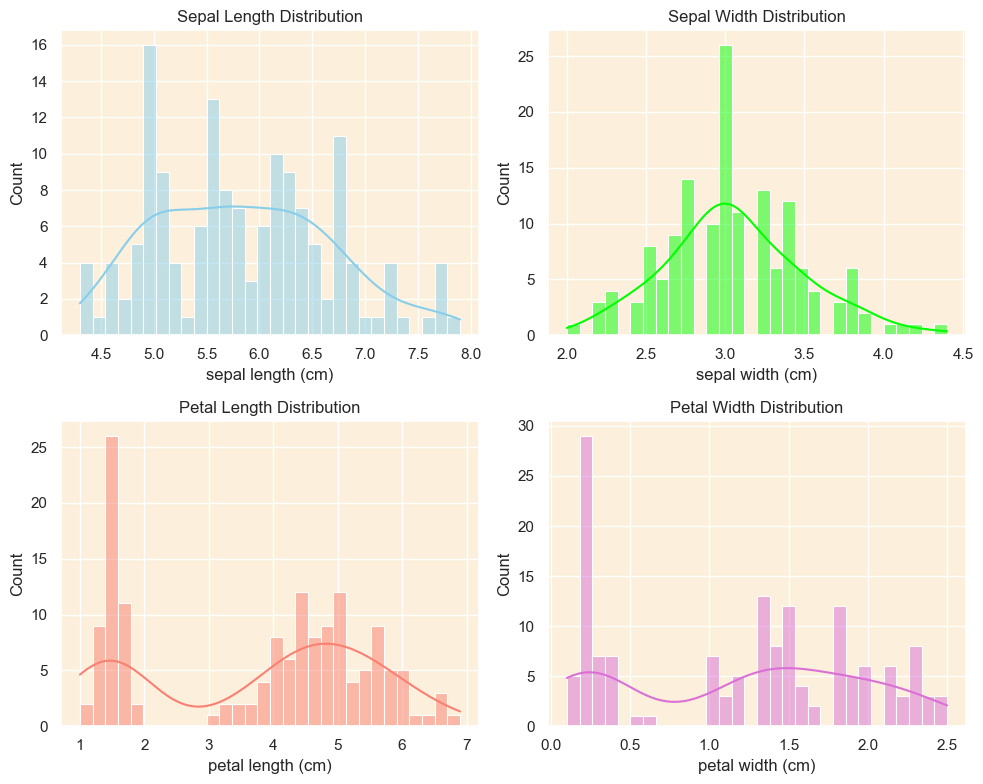

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(df['sepal length (cm)'], bins=30, color='skyblue', ax=axs[0, 0], kde=True)
axs[0, 0].set_title('Sepal Length Distribution')

sns.histplot(df['sepal width (cm)'], bins=30, color='lime', ax=axs[0, 1], kde=True)
axs[0, 1].set_title('Sepal Width Distribution')

sns.histplot(df['petal length (cm)'], bins=30, color='salmon', ax=axs[1, 0], kde=True)
axs[1, 0].set_title('Petal Length Distribution')

sns.histplot(df['petal width (cm)'], bins=30, color='orchid', ax=axs[1, 1], kde=True)
axs[1, 1].set_title('Petal Width Distribution')

plt.tight_layout()
plt.show()


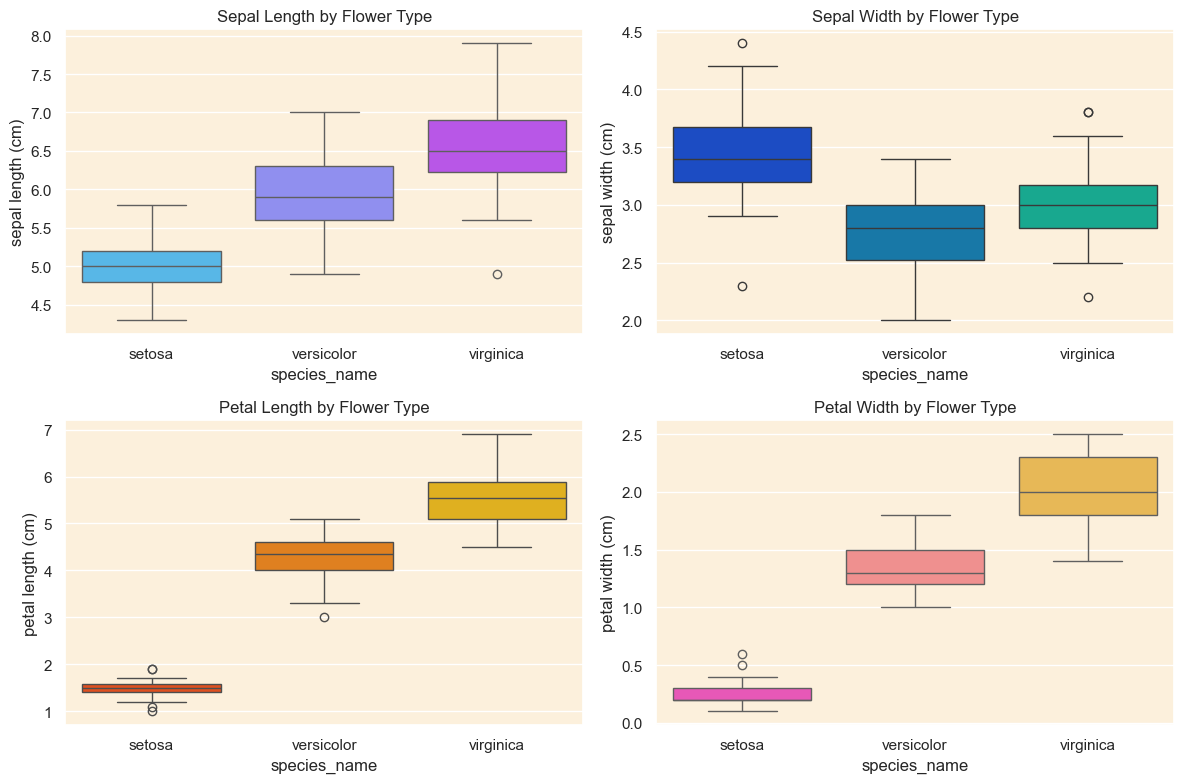

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(data=df, x='species_name', y='sepal length (cm)', palette='cool', ax=axs[0, 0])
axs[0, 0].set_title('Sepal Length by Flower Type')

sns.boxplot(data=df, x='species_name', y='sepal width (cm)', palette='winter', ax=axs[0, 1])
axs[0, 1].set_title('Sepal Width by Flower Type')

sns.boxplot(data=df, x='species_name', y='petal length (cm)', palette='autumn', ax=axs[1, 0])
axs[1, 0].set_title('Petal Length by Flower Type')

sns.boxplot(data=df, x='species_name', y='petal width (cm)', palette='spring', ax=axs[1, 1])
axs[1, 1].set_title('Petal Width by Flower Type')

plt.tight_layout()
plt.show()


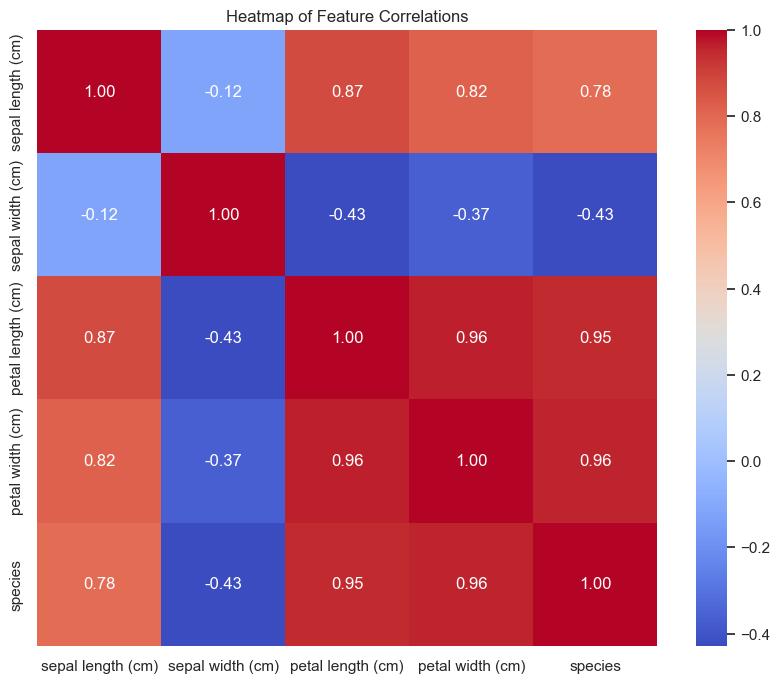

In [ ]:
correlation_matrix = df.iloc[:, :-1].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()


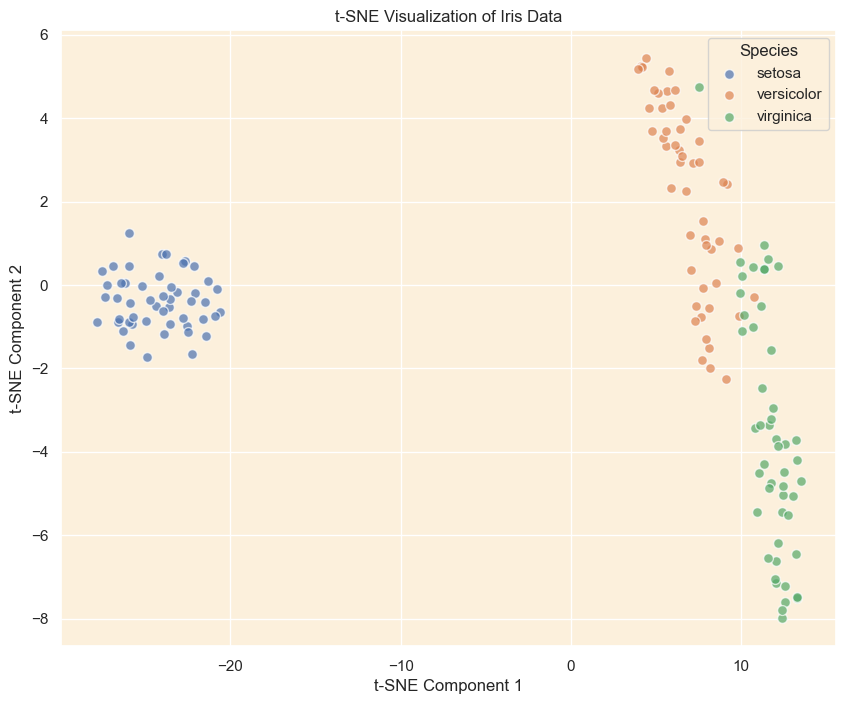

In [ ]:
# t-SNE
from sklearn.manifold import TSNE

df_tsne = df.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=64)
X_tsne = tsne.fit_transform(df[iris.feature_names])

df_tsne['tsne-2d-one'] = X_tsne[:, 0]
df_tsne['tsne-2d-two'] = X_tsne[:, 1]

plt.figure(figsize=(10, 8))
colors = ['C' + str(i) for i in range(len(iris.target_names))]
for target_name, color in zip(iris.target_names, colors):
    indices_to_plot = df_tsne['species_name'] == target_name
    plt.scatter(df_tsne.loc[indices_to_plot, 'tsne-2d-one'],
                df_tsne.loc[indices_to_plot, 'tsne-2d-two'],
                label=target_name, s=50, alpha=0.7, edgecolors='w')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Iris Data')
plt.legend(title='Species')
plt.grid(True)
plt.show()

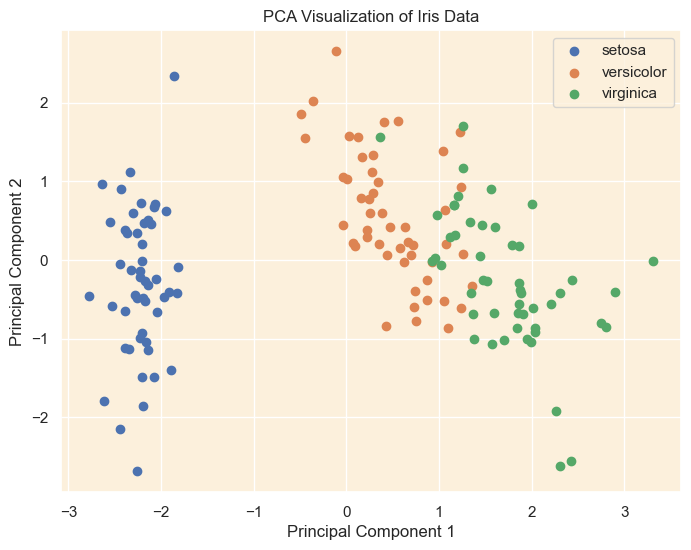

In [ ]:
# PCA
X = df[iris.feature_names].values
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std

cov_matrix = np.cov(X_standardized, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Select the top k eigenvectors (here we select top 2 for 2D visualization)
k = 2
eigenvector_subset = sorted_eigenvectors[:, 0:k]
X_reduced = np.dot(X_standardized, eigenvector_subset)

df_pca = pd.DataFrame(data=X_reduced, columns=['PC1', 'PC2'])
df_pca['species'] = df['species']
df_pca['species_name'] = df['species'].map(dict(enumerate(iris.target_names)))

plt.figure(figsize=(8, 6))
colors = ['C' + str(i) for i in range(len(iris.target_names))]
for target_name, color in zip(iris.target_names, colors):
    indices_to_plot = df_pca['species_name'] == target_name
    plt.scatter(df_pca.loc[indices_to_plot, 'PC1'],
                df_pca.loc[indices_to_plot, 'PC2'],
                label=target_name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Iris Data')
plt.legend()
plt.show()


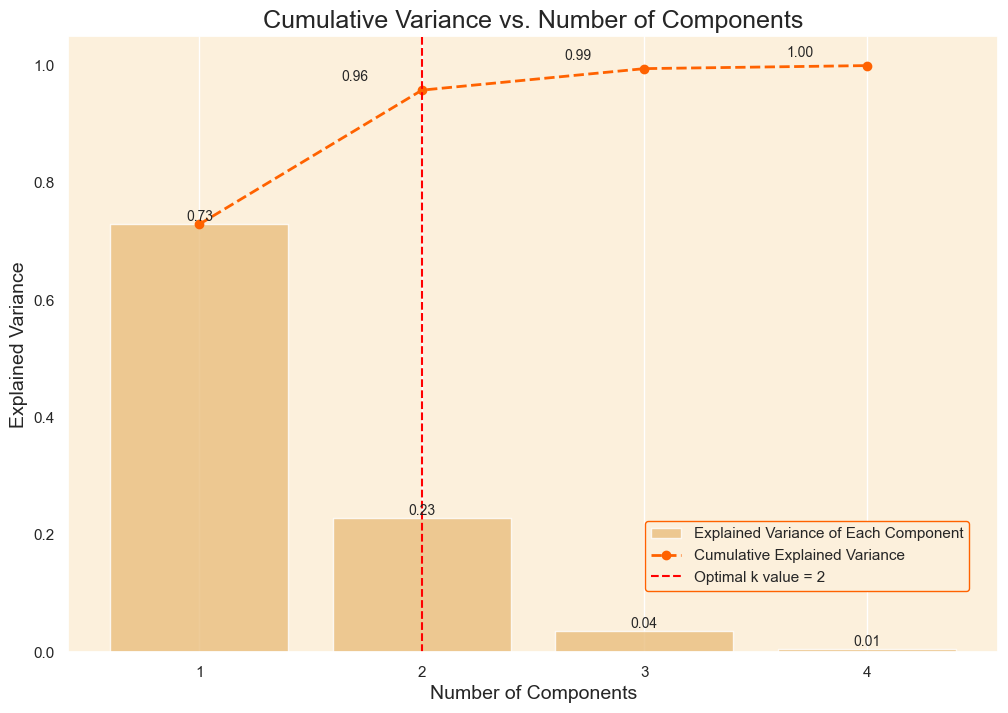

In [ ]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(df[iris.feature_names])

# Apply PCA
pca = PCA().fit(iris_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value
optimal_k = 2

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

plt.figure(figsize=(12, 8))

barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}')

plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,
           edgecolor='#ff6200')

x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')
plt.show()

## section 2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df['species'], test_size=0.2, random_state=64)
X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', random_state=64)
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)

In [ ]:
classification_rep_svm_linear = classification_report(y_test,y_pred)
print(classification_rep_svm_linear)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



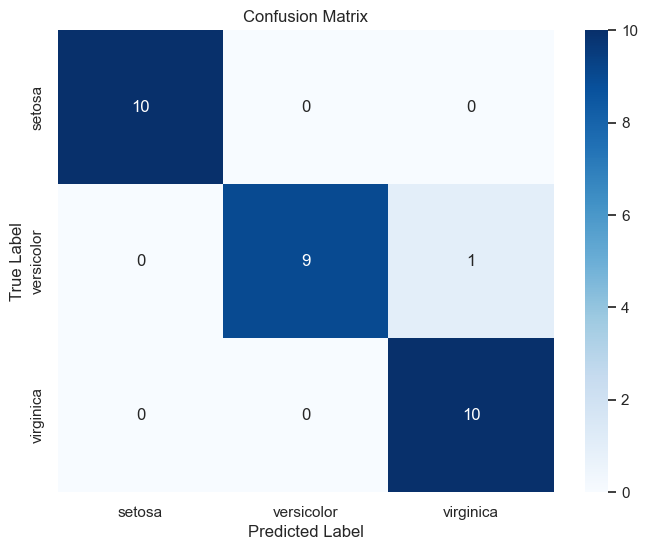

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
svm_linear.n_support_

array([ 3, 13, 11])

In [ ]:
svm_linear.support_vectors_

array([[-1.61563087, -1.66789878, -1.38568585, -1.18454392],
       [-1.01278353,  1.02467324, -1.21537281, -0.7863779 ],
       [-0.53050566,  0.80029224, -1.27214382, -1.05182191],
       [-1.133353  , -1.44351778, -0.25026556, -0.25548987],
       [ 0.07234168,  0.35153024,  0.60129966,  0.8062862 ],
       [ 0.19291115, -0.32161277,  0.43098662,  0.40812017],
       [ 0.55461955,  0.57591124,  0.54452865,  0.54084218],
       [ 0.55461955, -1.21913677,  0.65807068,  0.40812017],
       [ 0.43405009, -1.89227978,  0.43098662,  0.40812017],
       [ 0.55461955, -1.66789878,  0.37421561,  0.14267616],
       [-0.89221406, -1.21913677, -0.4205786 , -0.12276786],
       [ 1.03689743, -0.09723177,  0.71484169,  0.67356419],
       [ 0.31348062, -0.32161277,  0.54452865,  0.27539817],
       [-0.28936672, -0.09723177,  0.43098662,  0.40812017],
       [ 0.19291115,  0.80029224,  0.43098662,  0.54084218],
       [ 0.79575849, -0.54599377,  0.48775763,  0.40812017],
       [ 0.31348062, -0.

In [ ]:
print('weights : ',svm_linear.coef_[0] , 'bias : ',svm_linear.intercept_[0])

weights :  [-0.44813913  0.28577279 -0.92442691 -0.85964496] bias :  -1.5463270810616039


In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm_linear.fit(X_train_pca, y_train)

SVC(kernel='linear', random_state=64)

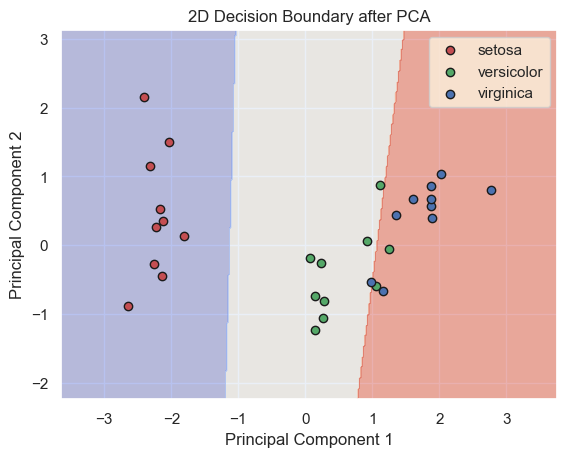

In [ ]:
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

colors = ['r', 'g', 'b']
target_names = iris.target_names
for i, color in zip(range(len(target_names)), colors):
    idx = np.where(y_test == i)
    plt.scatter(X_test_pca[idx, 0], X_test_pca[idx, 1], c=color, label=target_names[i], edgecolors='k')

plt.title('2D Decision Boundary after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## section 3

SVC with polynomial (degree 1) kernel: Accuracy = 0.97
SVC with polynomial (degree 2) kernel: Accuracy = 0.90
SVC with polynomial (degree 3) kernel: Accuracy = 0.90
SVC with polynomial (degree 4) kernel: Accuracy = 0.87
SVC with polynomial (degree 5) kernel: Accuracy = 0.90
SVC with polynomial (degree 6) kernel: Accuracy = 0.83
SVC with polynomial (degree 7) kernel: Accuracy = 0.80
SVC with polynomial (degree 8) kernel: Accuracy = 0.77
SVC with polynomial (degree 9) kernel: Accuracy = 0.80
SVC with polynomial (degree 10) kernel: Accuracy = 0.80


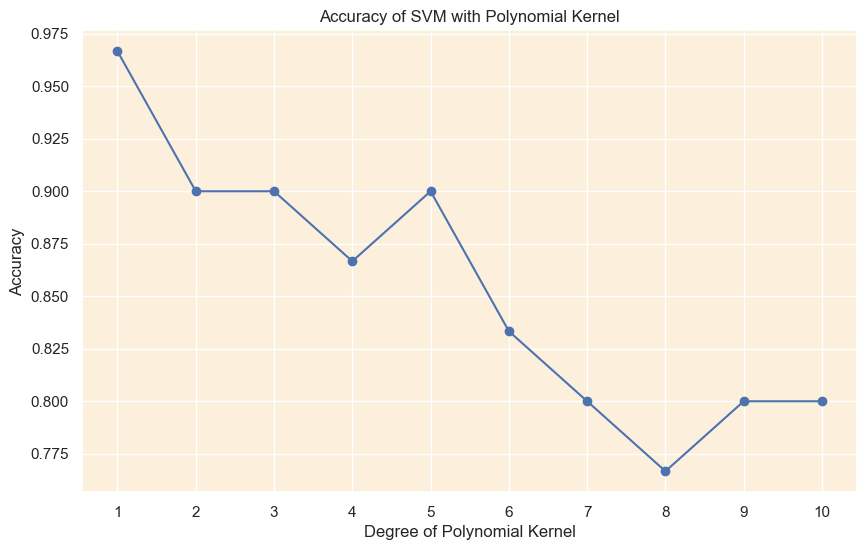

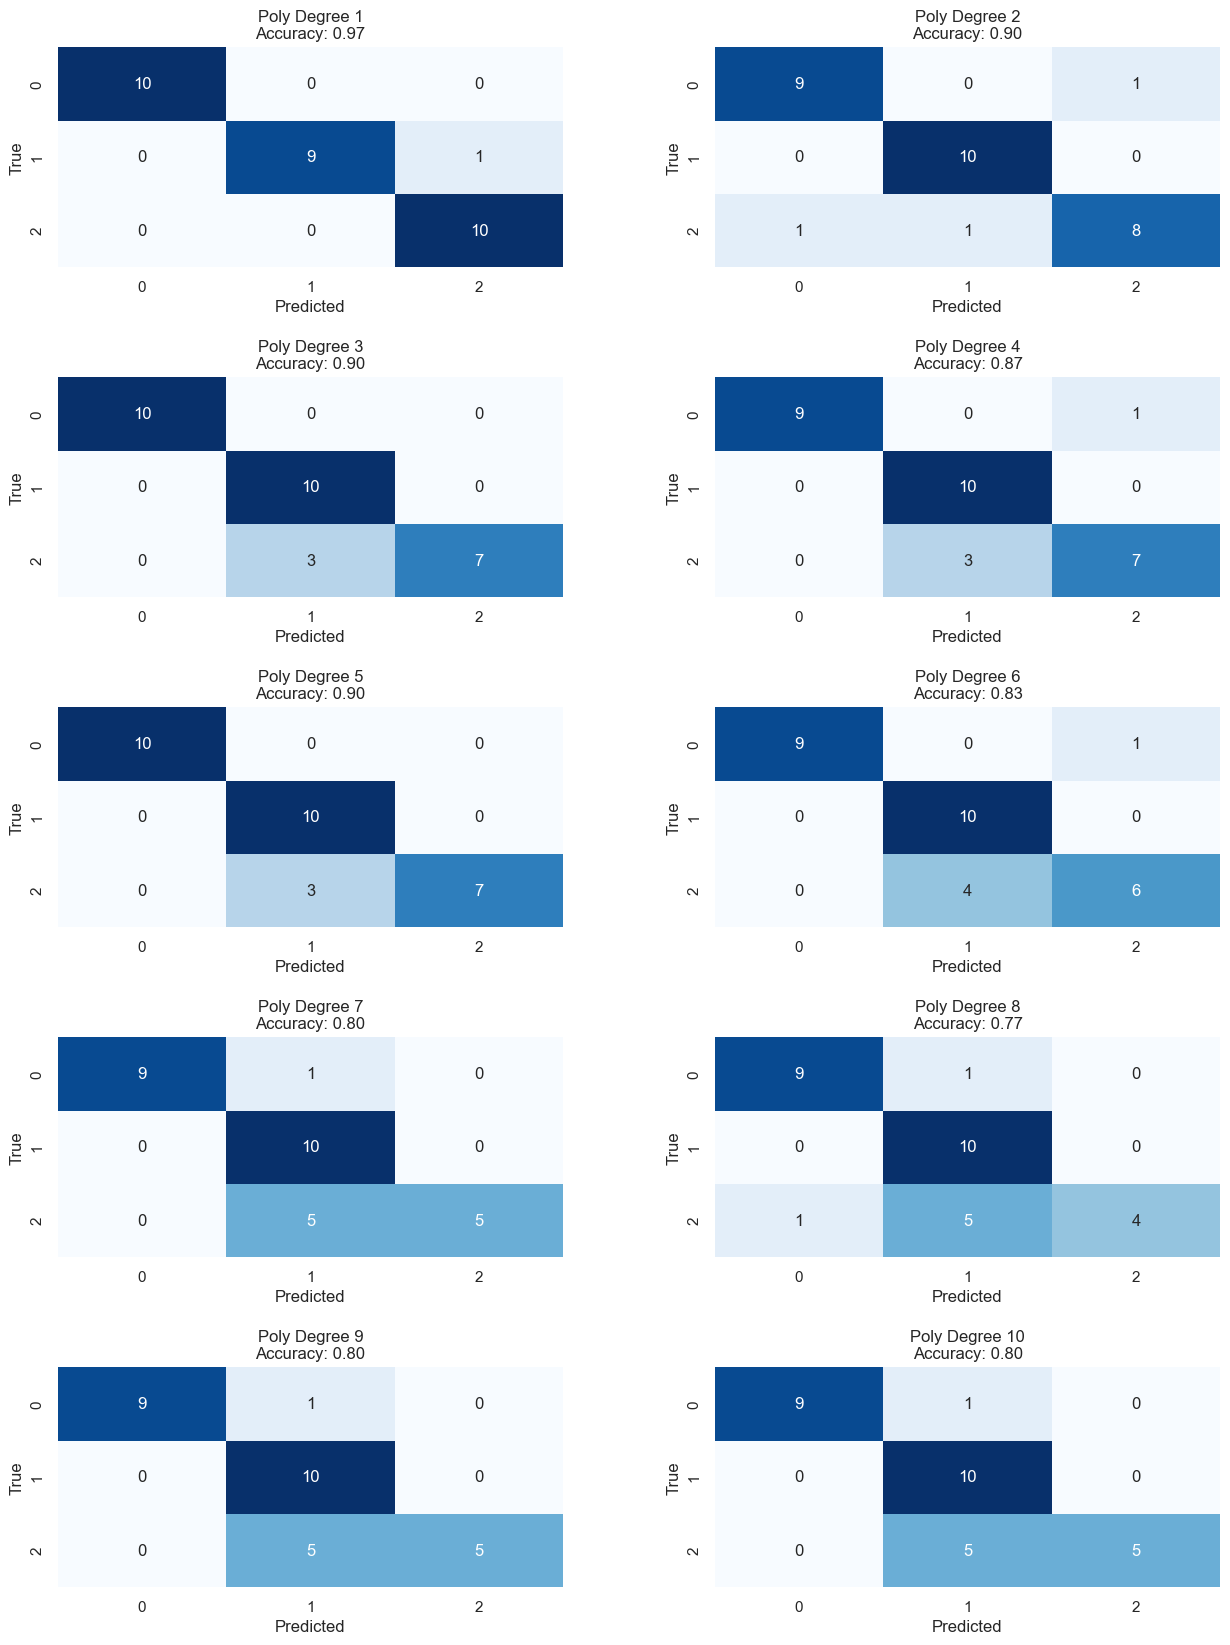

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

classifiers = [SVC(kernel='poly', degree=d, C=0.5) for d in range(1, 11)]

accuracies = []
degrees = range(1, 11)
conf_matrices = []

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    conf_matrices.append(confusion_matrix(y_test, y_pred))

for degree, accuracy in zip(degrees, accuracies):
    print(f'SVC with polynomial (degree {degree}) kernel: Accuracy = {accuracy:.2f}')

plt.figure(figsize=(10, 6))
plt.plot(degrees, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy of SVM with Polynomial Kernel')
plt.xlabel('Degree of Polynomial Kernel')
plt.ylabel('Accuracy')
plt.xticks(degrees)
plt.grid(True)
plt.show()

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for i, (conf_matrix, degree, ax) in enumerate(zip(conf_matrices, degrees, axes.flatten())):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'Poly Degree {degree}\nAccuracy: {accuracies[i]:.2f}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
plt.show()

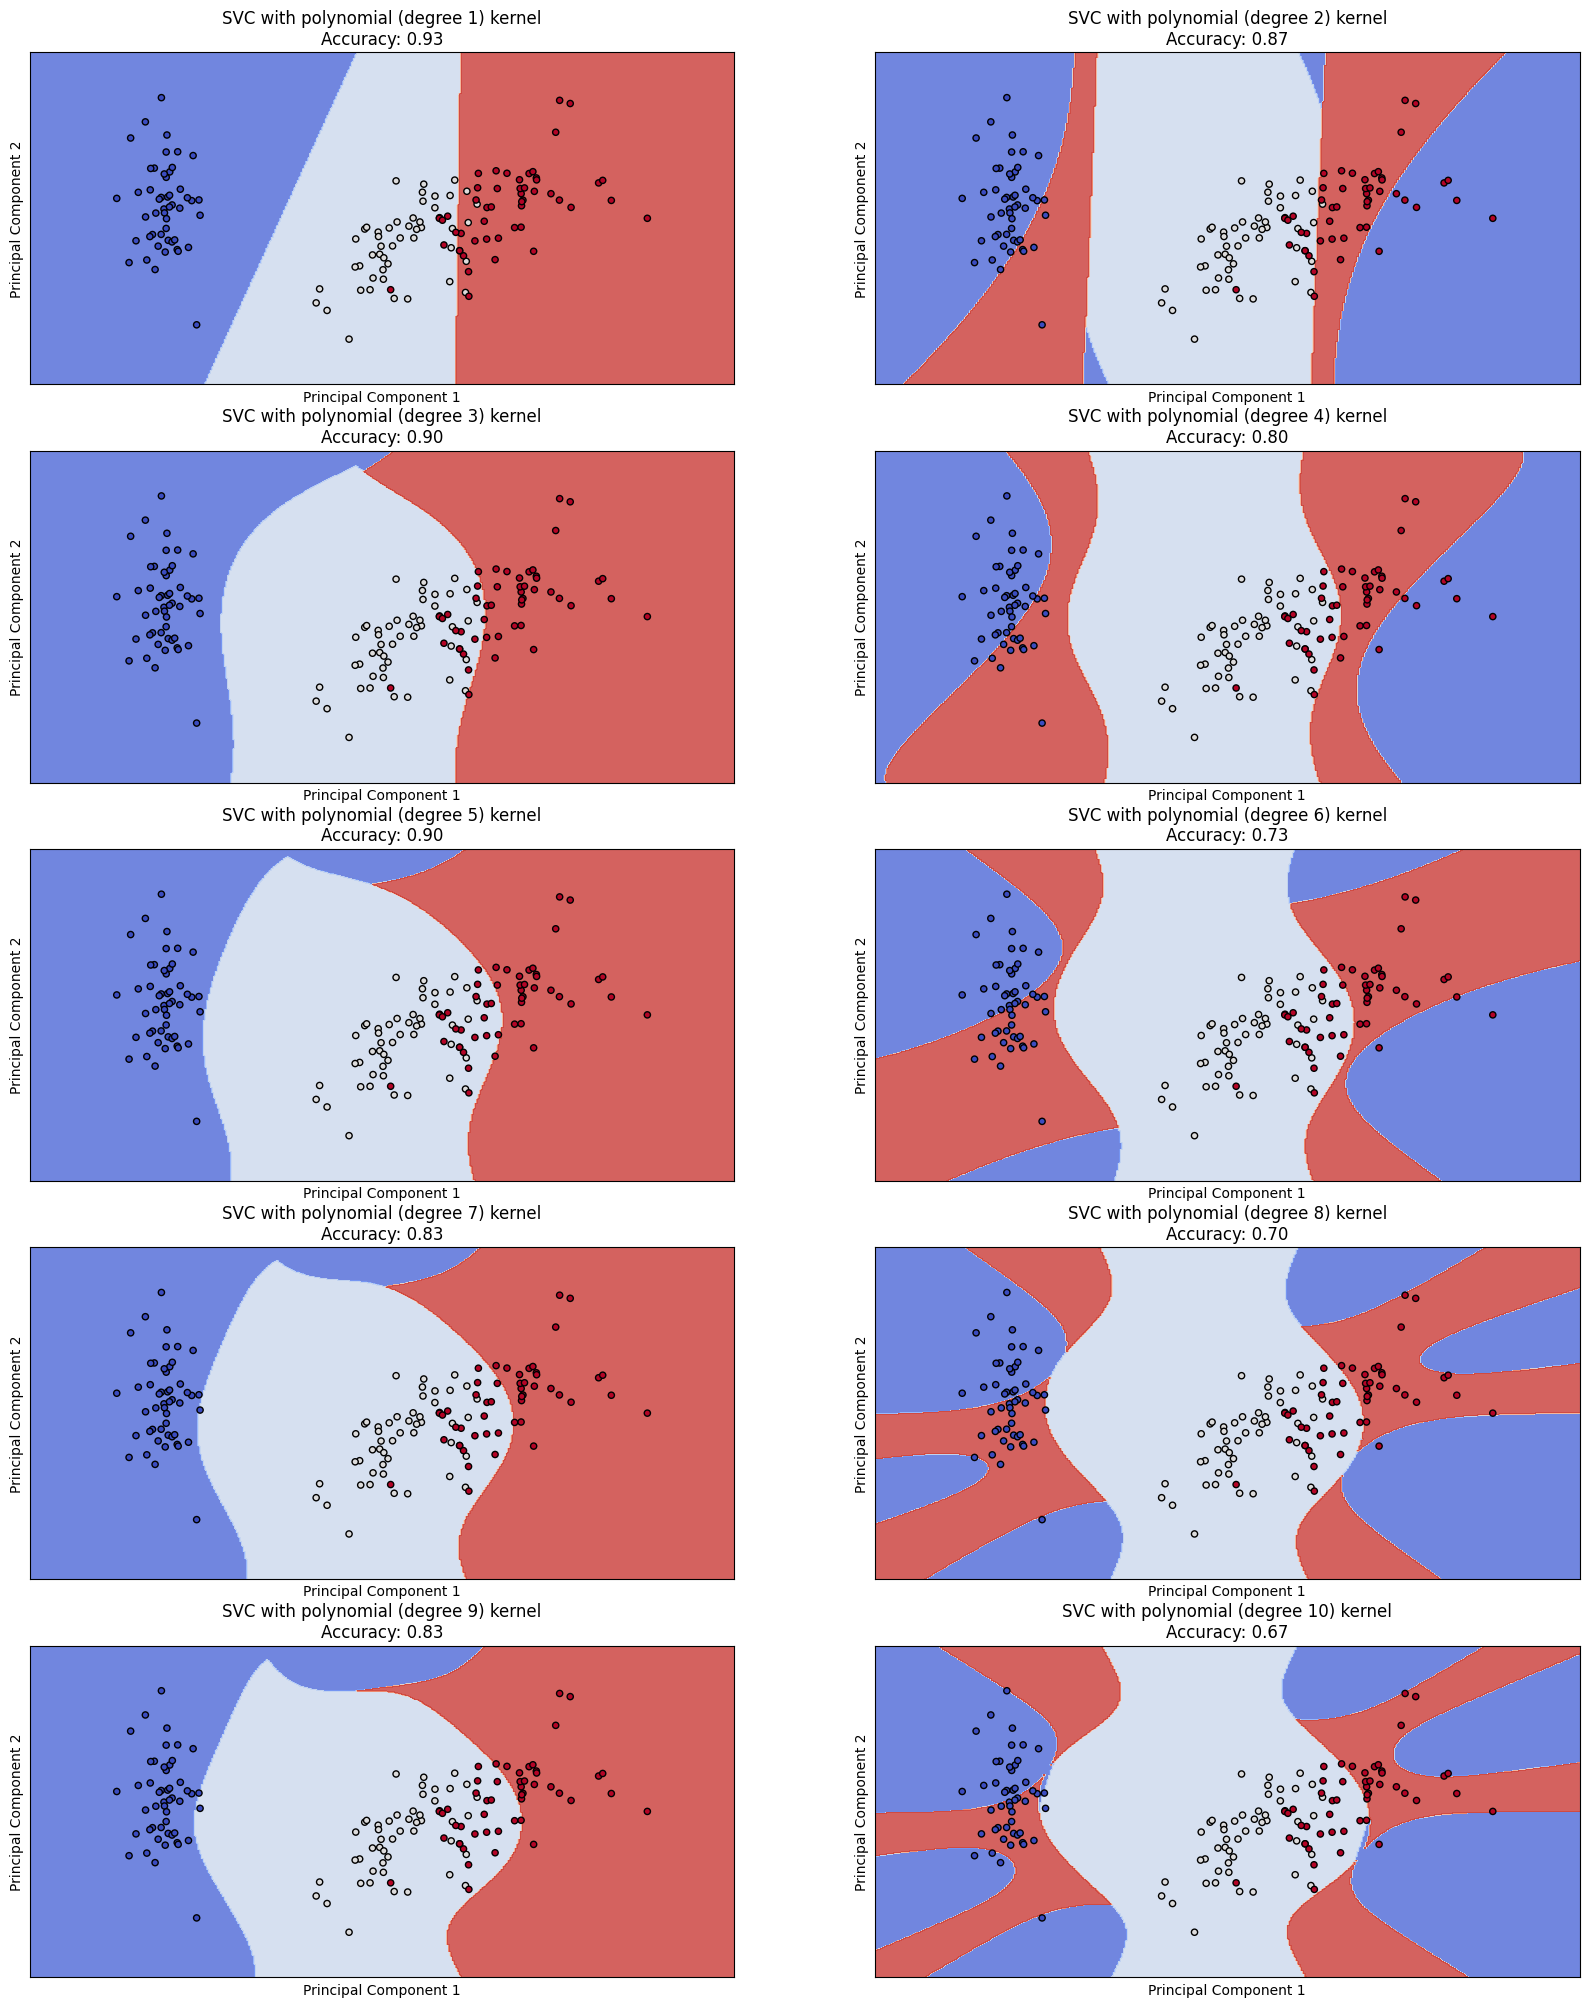

SVC with polynomial (degree 1) kernel: 0.93
SVC with polynomial (degree 2) kernel: 0.87
SVC with polynomial (degree 3) kernel: 0.90
SVC with polynomial (degree 4) kernel: 0.80
SVC with polynomial (degree 5) kernel: 0.90
SVC with polynomial (degree 6) kernel: 0.73
SVC with polynomial (degree 7) kernel: 0.83
SVC with polynomial (degree 8) kernel: 0.70
SVC with polynomial (degree 9) kernel: 0.83
SVC with polynomial (degree 10) kernel: 0.67


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reduce dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA components and the target
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# Extract X and y from the DataFrame
X = df_pca[['PC1', 'PC2']].values
y = df_pca['target'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# Define classifiers
classifiers = [SVC(kernel='poly', degree=d, C=0.5) for d in range(1, 11)]

# Titles for the plots
titles = [f'SVC with polynomial (degree {d}) kernel' for d in range(1, 11)]

fig, sub = plt.subplots(5, 2, figsize=(20, 25))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

accuracies = []

for clf, title, ax in zip(classifiers, titles, sub.flatten()):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f"{title}\nAccuracy: {accuracy:.2f}")

plt.show()

# Print accuracies
for title, accuracy in zip(titles, accuracies):
    print(f"{title}: {accuracy:.2f}")


In [14]:
import imageio
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from IPython.display import FileLink
from google.colab import drive


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


image_files = []
for degree in range(1, 11):
    clf = SVC(kernel='poly', degree=degree, C=0.5)
    clf.fit(X_train, y_train)

    fig, ax = plt.subplots(figsize=(10, 8))
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f'SVC with polynomial (degree {degree}) kernel')

    filename = f"svc_poly_degree_{degree}.png"
    plt.savefig(filename)
    image_files.append(filename)
    plt.close()

images = []
for filename in image_files:
    images.append(imageio.imread(filename))

# Save GIF to Google Drive
gif_path = '/content/drive/MyDrive/ML2024/MP3/Q1/poly.gif'
imageio.mimsave(gif_path, images, duration=2)  # Duration in seconds for each frame

print("GIF saved to Google Drive at:", gif_path)
# https://drive.google.com/file/d/1-3nXFI7b1Xz1q5_dduLF9mouiE4Qz-BG/view?usp=sharing

GIF saved to Google Drive at: /content/drive/MyDrive/ML2024/MP3/Q1/poly.gif


## section 4

In [15]:
import cvxopt
def linear_kernel( x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel( x, y, C=1.0, d=3):
    return (np.dot(x, y) + C) ** d

def gaussian_kernel( x, y, gamma=0.5):
    return np.exp(-gamma*np.linalg.norm(x - y) ** 2)

def sigmoid_kernel( x, y, alpha=1, C=0.01):
    a= alpha * np.dot(x, y) + C
    return np.tanh(a)

def SVM1(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    kernel_and_params=(kernel_type,poly_params, RBF_params, sigmoid_params,C)
    n_samples, n_features = X.shape
    # Compute the Gram matrix
    K = np.zeros((n_samples, n_samples))
    if kernel_type == 'linear':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = linear_kernel(X[i], X[j])
    elif kernel_type == 'polynomial':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = polynomial_kernel(X[i], X[j], poly_params[0], poly_params[1])
    elif kernel_type == 'RBF':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = gaussian_kernel(X[i], X[j], RBF_params)
    elif kernel_type == 'sigmoid':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = sigmoid_kernel(X[i], X[j], sigmoid_params[0], sigmoid_params[1])
    else:
        raise ValueError("Invalid kernel type")

    # construct P, q, A, b, G, h matrices for CVXOPT
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(y, (1, n_samples))
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.vstack((np.diag(np.ones(n_samples) * -1), np.identity(n_samples))))
    h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    # solve QP problem
    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    # Lagrange multipliers
    a = np.ravel(solution['x'])
    # Support vectors have non zero lagrange multipliers
    sv = a > 1e-5  # some small threshold

    ind = np.arange(len(a))[sv]
    a = a[sv]
    sv_x = X[sv]
    sv_y = y[sv]
    numbers_of_sv=len(sv_y)
    # Bias (For linear it is the intercept):
    bias = 0
    for n in range(len(a)):
        # For all support vectors:
        bias += sv_y[n]
        bias -= np.sum(a * sv_y * K[ind[n], sv])
    bias = bias / (len(a)+0.0001)

    if kernel_type == 'linear':
        w = np.zeros(n_features)
        for n in range(len(a)):
            w += a[n] * sv_y[n] * sv_x[n]
    else:
        w = None

    y_pred=0
    if w is not None:
        y_pred = np.sign(np.dot(X_t, w) + bias)
    else:
        y_predict = np.zeros(len(X_t))
        for i in range(len(X_t)):
            s = 0
            for a1, sv_y1, sv1 in zip(a ,sv_y, sv_x):
                # a : Lagrange multipliers, sv : support vectors.
                # Hypothesis: sign(sum^S a * y * kernel + b)

                if kernel_type == 'linear':
                    s += a1 * sv_y1 * linear_kernel(X_t[i], sv1)
                if kernel_type=='RBF':
                    s += a1 * sv_y1 * gaussian_kernel(X_t[i], sv1, RBF_params)   # Kernel trick.
                if kernel_type == 'polynomial':
                    s += a1 * sv_y1 * polynomial_kernel(X_t[i], sv1, poly_params[0], poly_params[1])
                if kernel_type == 'sigmoid':
                    s=+ a1 * sv_y1 *sigmoid_kernel( X_t[i],  sv1, sigmoid_params[0], sigmoid_params[1])
            y_predict[i] = s
        y_pred = np.sign(y_predict + bias)

    return w, bias, solution,a, sv_x, sv_y, y_pred, kernel_and_params



def multiclass_svm(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    class_labels = list(set(y))

    classifiers = {}
    w_catch = {}  # catching w, b only for plot part
    b_catch = {}
    a_catch = {}
    sv_x_catch = {}
    sv_y_catch = {}

    for i, class_label in enumerate(class_labels):
        binary_y = np.where(y == class_label, 1.0, -1.0)
        w, bias, solution, a, sv_x, sv_y, prediction, kernel_and_params = SVM1(X, X_t, binary_y, C, kernel_type, poly_params, RBF_params, sigmoid_params)
        classifiers[class_label] = (w, bias, a, sv_x, sv_y, kernel_and_params)
        w_catch[class_label] = w
        b_catch[class_label] = bias
        a_catch[class_label] = a
        sv_x_catch[class_label] = sv_x
        sv_y_catch[class_label] = sv_y

    def decision_function(X_t):
        decision_scores = np.zeros((X_t.shape[0], len(class_labels)))
        for i, label in enumerate(class_labels):
            w, bias, a, sv_x, sv_y, kernel_and_params = classifiers[label]
            if w is not None:
                decision_scores[:, i] = np.dot(X_t, w) + bias
            else:
                decision_values = np.zeros(X_t.shape[0])
                for j in range(X_t.shape[0]):
                    s = 0
                    for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                        if kernel_type == 'linear':
                            s += a1 * sv_y1 * linear_kernel(X_t[j], sv1)
                        elif kernel_type == 'RBF':
                            s += a1 * sv_y1 * gaussian_kernel(X_t[j], sv1, RBF_params)
                        elif kernel_type == 'polynomial':
                            s += a1 * sv_y1 * polynomial_kernel(X_t[j], sv1, poly_params[0], poly_params[1])
                        elif kernel_type == 'sigmoid':
                            s += a1 * sv_y1 * sigmoid_kernel(X_t[j], sv1, sigmoid_params[0], sigmoid_params[1])
                    decision_values[j] = s
                decision_scores[:, i] = decision_values + bias
        return np.argmax(decision_scores, axis=1), kernel_and_params, w_catch, b_catch, classifiers

    return decision_function(X_t)

def visualize_multiclass_classification1(X_train, y_train1, kernel_type, trainset, classifiers, class_labels, w_stack, b_stack, epsilon=1e-10):
    plt.figure(figsize=(6, 4))
    for i, target_name in enumerate(class_labels):
        plt.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':
        for i in range(len(class_labels)):
            w = w_stack[i]
            bias = b_stack[i]
            x_points = np.linspace(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1, 200)
            y_points = -(w[0] / (w[1] + epsilon)) * x_points - bias / (w[1] + epsilon)
            plt.plot(x_points, y_points, c='r', label='Decision Boundary')

    elif kernel_type == 'polynomial':
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
        Z = np.zeros(xx.shape)
        for i in range(len(class_labels)):
            Z = np.zeros(xx.shape)
            for j in range(xx.shape[0]):
                for k in range(xx.shape[1]):
                    sample_point = np.array([xx[j, k], yy[j, k]])
                    decision_value = 0
                    w, bias, a, sv_x, sv_y, kernel_and_params = classifiers[i]
                    for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                        decision_value += a1 * sv_y1 * polynomial_kernel(sample_point, sv1, C=kernel_and_params[1][0], d=kernel_and_params[1][1])
                    decision_value += bias
                    Z[j, k] = decision_value
            plt.contour(xx, yy, Z, levels=[0], colors='r')

    if trainset:
        plt.title('Data Points')
    else:
        plt.title('Data Points on Test Set')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)
    plt.show()


Training with polynomial degree 1
Degree: 1, Accuracy: 0.9333333333333333


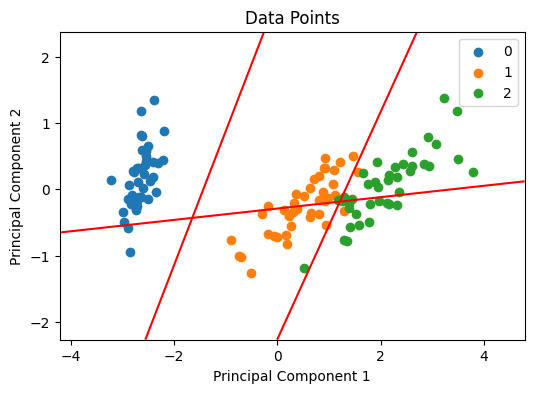

Training with polynomial degree 2
Degree: 2, Accuracy: 0.9666666666666667


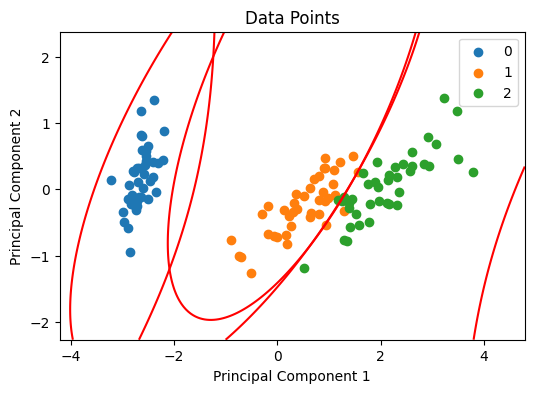

Training with polynomial degree 3
Degree: 3, Accuracy: 0.9666666666666667


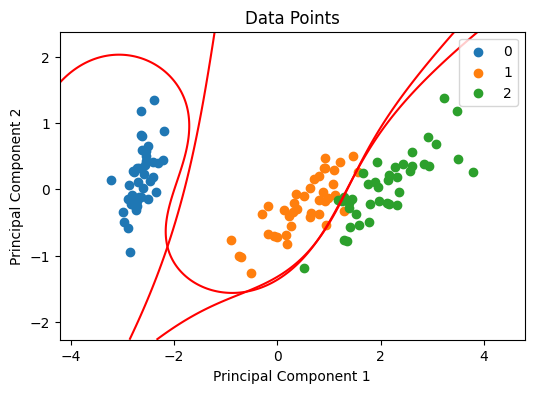

Training with polynomial degree 4
Degree: 4, Accuracy: 0.9666666666666667


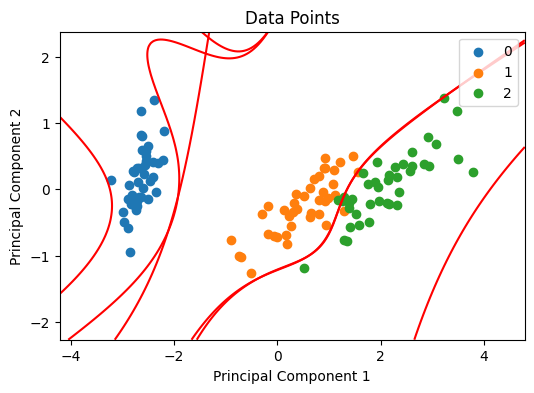

Training with polynomial degree 5
Degree: 5, Accuracy: 0.9666666666666667


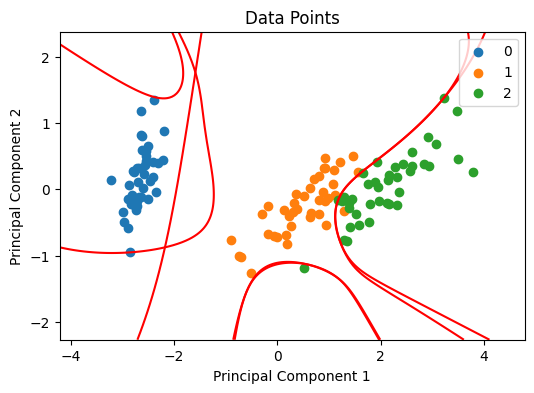

Training with polynomial degree 6
Degree: 6, Accuracy: 0.9666666666666667


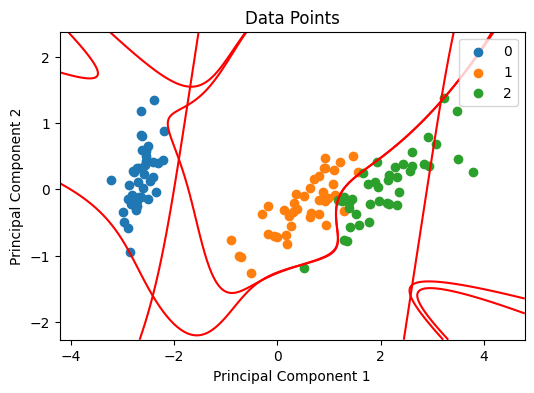

Training with polynomial degree 7
Degree: 7, Accuracy: 0.9


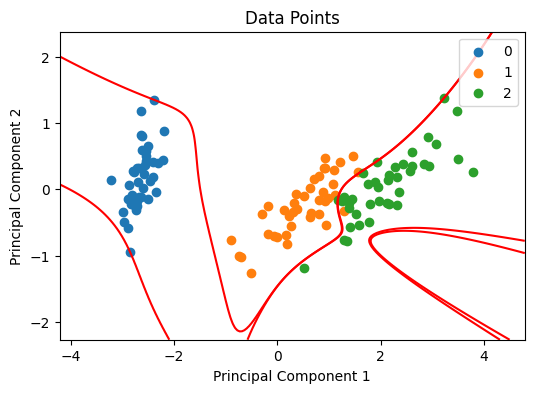

Training with polynomial degree 8
Degree: 8, Accuracy: 0.5333333333333333


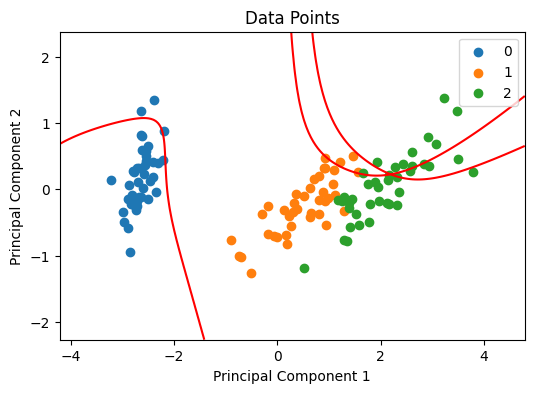

Training with polynomial degree 9
Degree: 9, Accuracy: 0.3


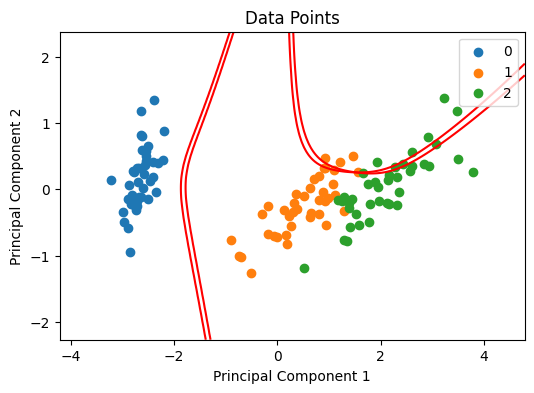

Training with polynomial degree 10
Degree: 10, Accuracy: 0.1


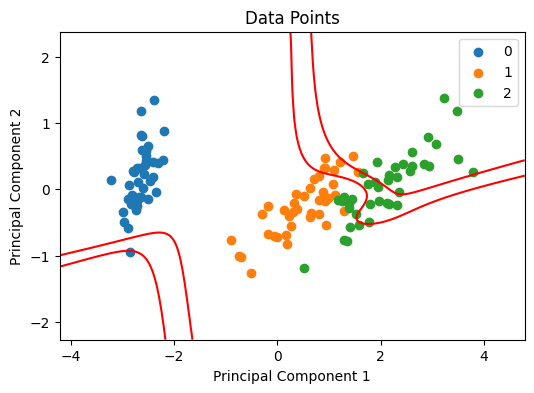

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=64)

accuracies = []

for degree in range(1, 11):
    print(f"Training with polynomial degree {degree}")
    predictions, kernel_and_params, w_catch, b_catch, classifiers = multiclass_svm(
        X_train, X_test, y_train, C=1.0, kernel_type='polynomial', poly_params=(1.0, degree)
    )
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f"Degree: {degree}, Accuracy: {accuracy}")

    visualize_multiclass_classification1(X_train, y_train, 'polynomial', True, classifiers, np.unique(y_train), w_catch, b_catch)


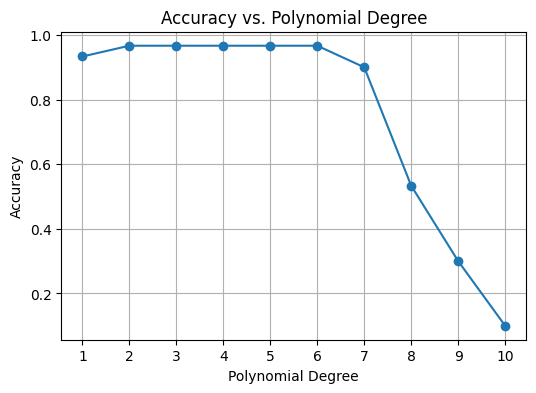

In [18]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), accuracies, marker='o')
plt.title('Accuracy vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Training with polynomial degree 1
Degree: 1, Accuracy: 0.9333333333333333
Training with polynomial degree 2
Degree: 2, Accuracy: 0.9666666666666667
Training with polynomial degree 3
Degree: 3, Accuracy: 0.9666666666666667
Training with polynomial degree 4
Degree: 4, Accuracy: 0.9666666666666667
Training with polynomial degree 5
Degree: 5, Accuracy: 0.9666666666666667
Training with polynomial degree 6
Degree: 6, Accuracy: 0.9666666666666667
Training with polynomial degree 7
Degree: 7, Accuracy: 0.9
Training with polynomial degree 8
Degree: 8, Accuracy: 0.5333333333333333
Training with polynomial degree 9
Degree: 9, Accuracy: 0.3
Training with polynomial degree 10
Degree: 10, Accuracy: 0.1
GIF saved to Google Drive at: /content/drive/MyDrive/ML2024/MP3/Q1/poly2.gif


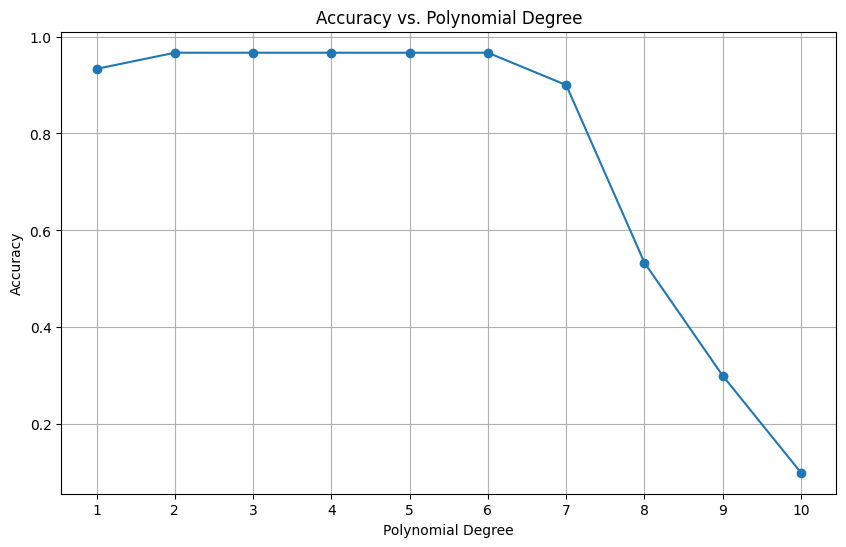

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import imageio
from google.colab import drive
from IPython.display import FileLink


# Load and prepare the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Reduce to 2D using PCA for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=64)

# Helper functions for meshgrid and plotting
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, classifiers, xx, yy, **params):
    Z = np.zeros(xx.shape)
    for label, clf in classifiers.items():
        Z += clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Custom visualization function for SVM
def visualize_multiclass_classification1(X_train, y_train1, kernel_type, classifiers, class_labels, w_stack, b_stack, epsilon=1e-10, ax=None):
    if ax is None:
        ax = plt.gca()

    # Plotting data points for each class
    for i, target_name in enumerate(class_labels):
        ax.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':
        for i in range(len(class_labels)):
            if w_stack[i] is None:
                continue
            w = w_stack[i]
            bias = b_stack[i]
            x_points = np.linspace(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1, 200)
            y_points = -(w[0] / (w[1] + epsilon)) * x_points - bias / (w[1] + epsilon)
            ax.plot(x_points, y_points, c='r', label='Decision Boundary')

    elif kernel_type == 'polynomial':
        # Create a mesh grid
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
        Z = np.zeros(xx.shape)
        for i in range(len(class_labels)):
            if i not in classifiers:
                continue
            Z = np.zeros(xx.shape)
            for j in range(xx.shape[0]):
                for k in range(xx.shape[1]):
                    sample_point = np.array([xx[j, k], yy[j, k]])
                    decision_value = 0
                    w, bias, a, sv_x, sv_y, kernel_and_params = classifiers[i]
                    for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                        decision_value += a1 * sv_y1 * polynomial_kernel(sample_point, sv1, C=kernel_and_params[1][0], d=kernel_and_params[1][1])
                    decision_value += bias
                    Z[j, k] = decision_value
            ax.contour(xx, yy, Z, levels=[0], colors='r')

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.legend()
    ax.set_xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    ax.set_ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)

# Train SVM with polynomial kernel of varying degrees and visualize results
image_files = []
accuracies = []

for degree in range(1, 11):
    print(f"Training with polynomial degree {degree}")
    predictions, kernel_and_params, w_catch, b_catch, classifiers = multiclass_svm(
        X_train, X_test, y_train, C=1.0, kernel_type='polynomial', poly_params=(1.0, degree)
    )
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f"Degree: {degree}, Accuracy: {accuracy}")

    # Create mesh grid
    xx, yy = make_meshgrid(X_train[:, 0], X_train[:, 1])

    # Plot decision boundaries
    fig, ax = plt.subplots(figsize=(10, 8))
    visualize_multiclass_classification1(X_train, y_train, 'polynomial', classifiers, np.unique(y_train), w_catch, b_catch, ax=ax)
    ax.set_title(f'Degree: {degree}, Accuracy: {accuracy:.2f}')

    filename = f"svc_poly_degree_{degree}.png"
    plt.savefig(filename)
    image_files.append(filename)
    plt.close()

# Create a GIF from the saved images
images = []
for filename in image_files:
    images.append(imageio.imread(filename))

# Save GIF to Google Drive
gif_path = '/content/drive/MyDrive/ML2024/MP3/Q1/poly2.gif'
imageio.mimsave(gif_path, images, duration=2)  # Duration in seconds for each frame
# https://drive.google.com/file/d/1-9cPjpFSqGxm4PQUimNrkbjAsCf-LVZK/view?usp=sharing
print("GIF saved to Google Drive at:", gif_path)
FileLink(gif_path)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies, marker='o')
plt.title('Accuracy vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()
